# Titanic: Machine Learning from Disaster
## タイタニック号の生存予測


[データ元(kaggle)](https://www.kaggle.com/c/titanic/data)  

タイタニック号の乗客の生存を予測するタスクです。  
このプログラムは主に可視化等を行います。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("./titanic/train.csv")
df_train = df_train.drop("PassengerId", axis=1)

各カラムの意味   

| columns | 意味 |
|----|----|
|PassengerId |乗客識別ユニークID|
|Survived |生存フラグ（0=死亡、1=生存）|
|Pclass |チケットクラス|
|Name |乗客の名前|
|Sex |性別（male=男性、female＝女性）|
|Age |年齢|
|SibSp |タイタニックに同乗している兄弟/配偶者の数|
|parch |タイタニックに同乗している親/子供の数|
|ticket |チケット番号|
|fare |料金|
|cabin |客室番号|
|Embarked |出港地（タイタニックへ乗った港）|

C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program File

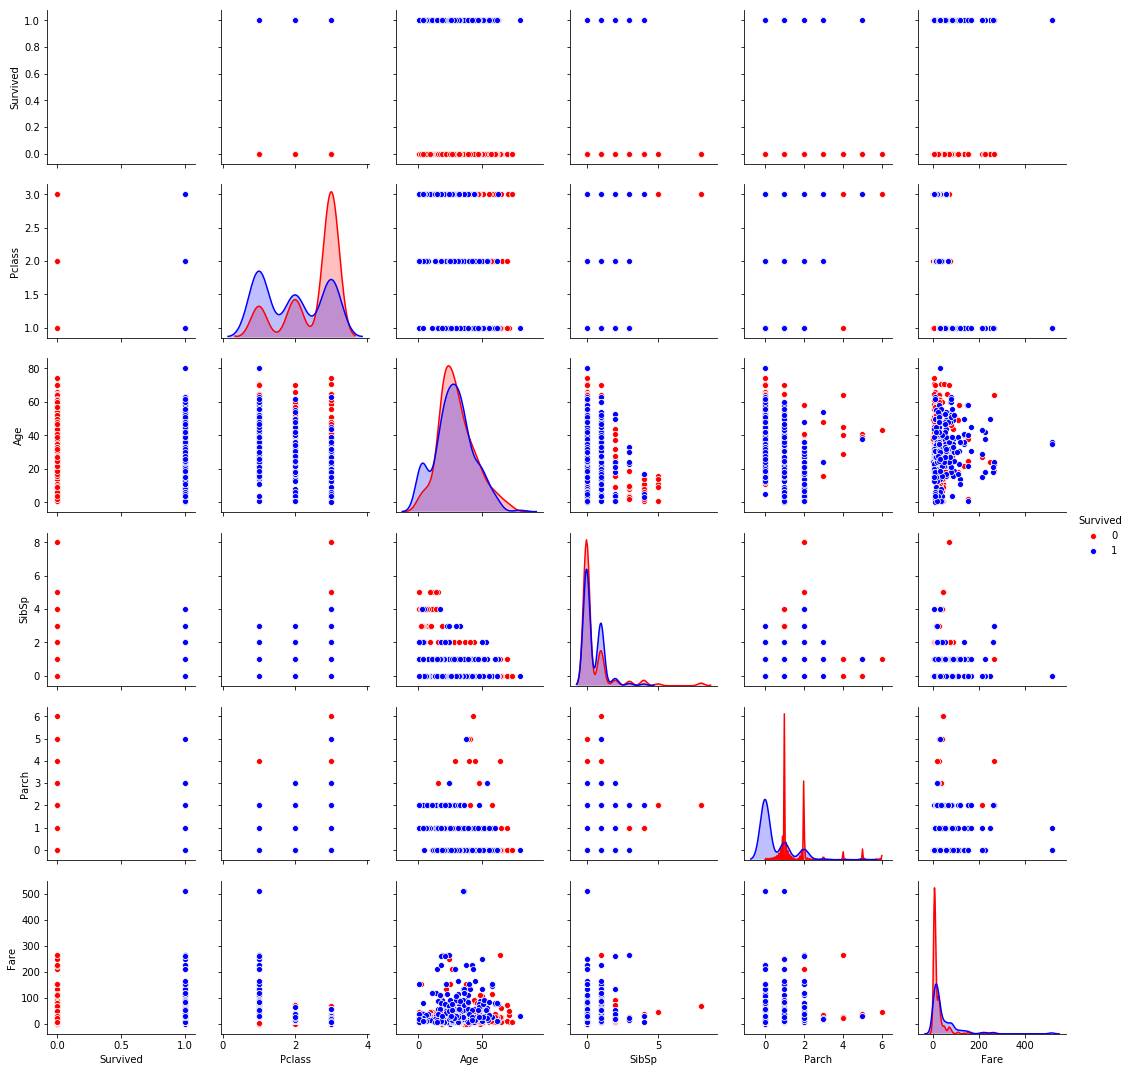

In [47]:
sns.pairplot(df_train, hue="Survived", size=2.5,palette={0:"red",1:"blue"})

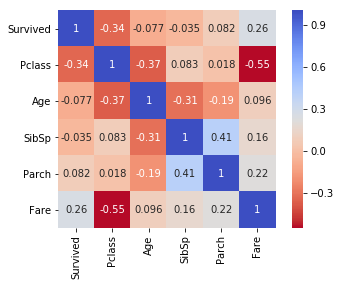

In [7]:
corr = df_train.corr()
# _rをつけると逆になる
cmap = sns.color_palette("coolwarm_r", 200)
sns.heatmap(corr, square=True, annot=True,cmap=cmap)

In [8]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
for col in df_train.columns:
    count = len(df_train[col].unique())
    if count > 20:
        continue
    print("{0} : {1}".format(col,df_train[col].unique()))
    v_count = df_train[col].value_counts()
    print(v_count.sort_index())
    print("---------")

Survived : [0 1]
0    549
1    342
Name: Survived, dtype: int64
---------
Pclass : [3 1 2]
1    216
2    184
3    491
Name: Pclass, dtype: int64
---------
Sex : ['male' 'female']
female    314
male      577
Name: Sex, dtype: int64
---------
SibSp : [1 0 3 4 2 5 8]
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
---------
Parch : [0 1 2 5 3 4 6]
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
---------
Embarked : ['S' 'C' 'Q' nan]
C    168
Q     77
S    644
Name: Embarked, dtype: int64
---------


In [29]:
# ユニーク数が5件以下2以上はone - hot encoding 対象とする
# カラムの意味的にも質的変数なのは間違いなさそう

one_hot_encoding_columns=[]
for col in df_train.columns:
    count = len(df_train[col].unique())
    if count > 5:
        continue
    if count <=2:
        continue
    one_hot_encoding_columns.append(col)

In [58]:
one_hot_encoding_columns

['Pclass', 'Embarked']

In [51]:
df_train_feature = df_train.copy(deep=True)

# 兄弟の数と子供・両親の数を足してしまった方がいいのではないか


In [52]:
df_train_feature["SibSp_Parch"] = df_train_feature["SibSp"]+df_train_feature["Parch"]

In [53]:
df_train_feature = pd.get_dummies(df_train_feature,columns=one_hot_encoding_columns)
df_train_feature

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SibSp_Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,1,0,0,0,0,1
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,0,1,0,0,1
5,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,0,0,0,1,0,1,0
6,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0,1,0,0,0,0,1
7,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,4,0,0,1,0,0,1
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,2,0,0,1,0,0,1
9,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1,0,1,0,1,0,0


In [54]:
df_train_feature.columns[:10]

Index(['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'SibSp_Parch'],
      dtype='object')

Pclass_1


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program File

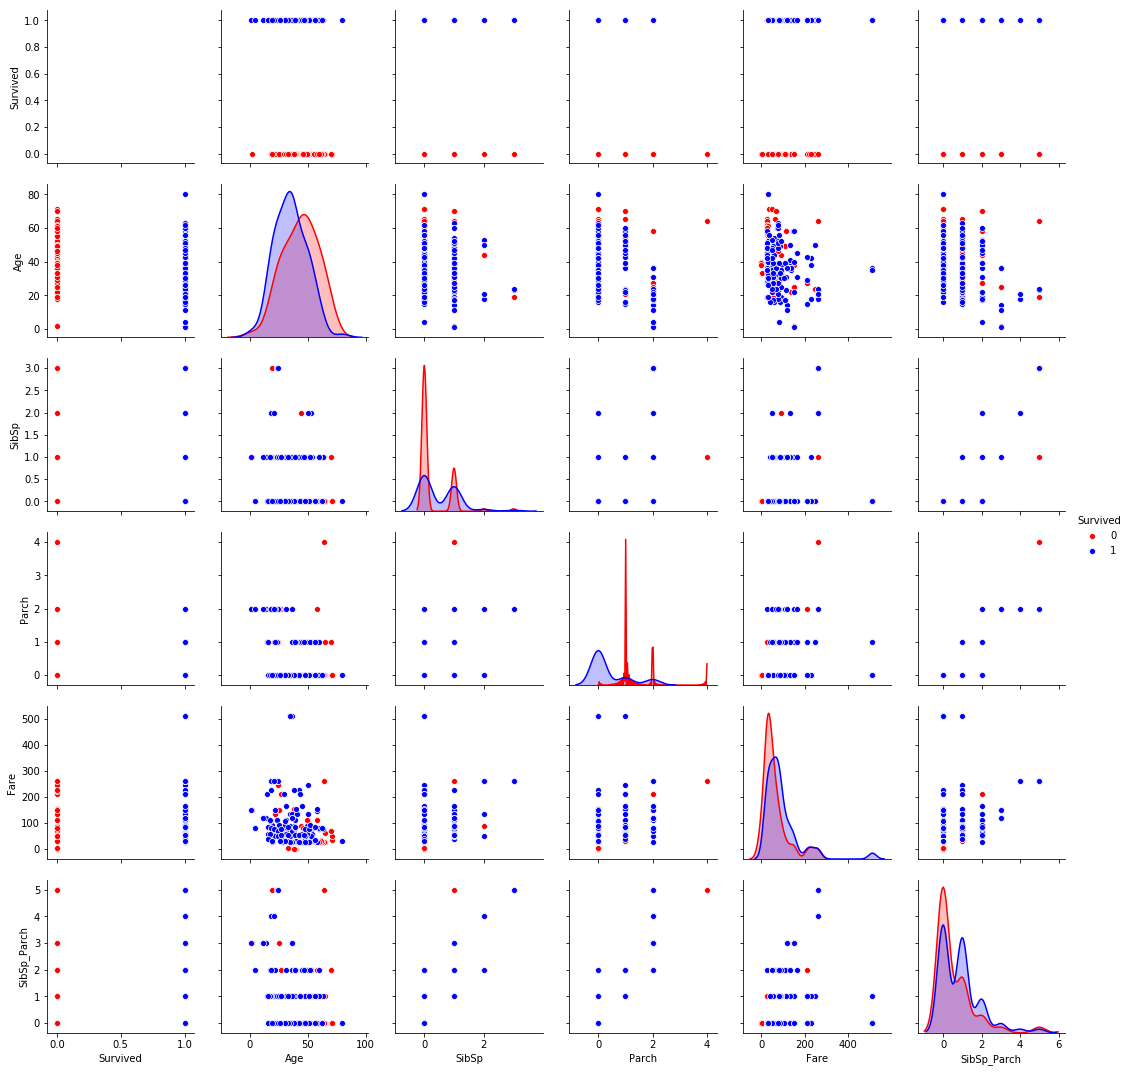

Pclass_2


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


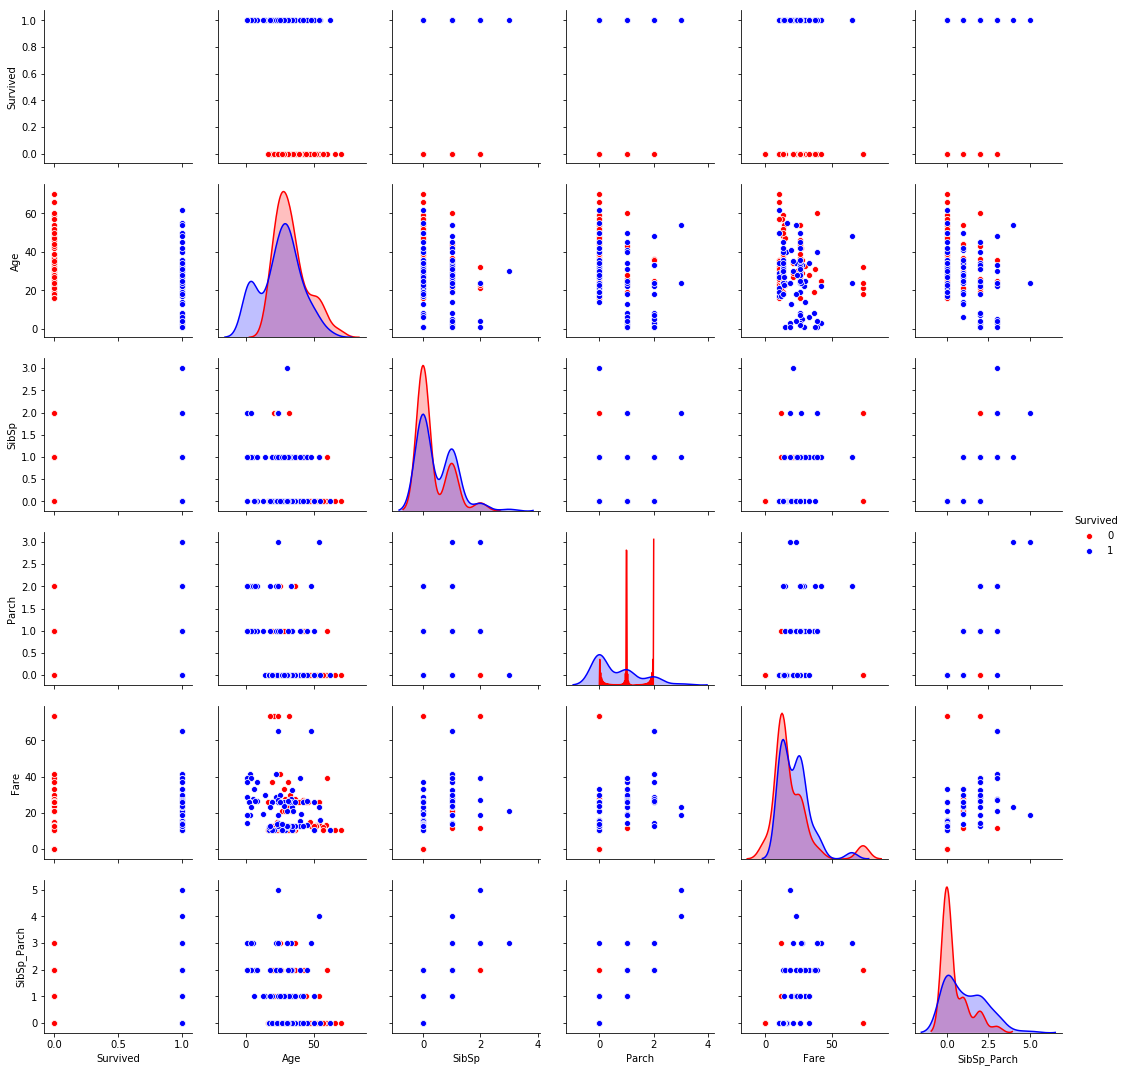

Pclass_3


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


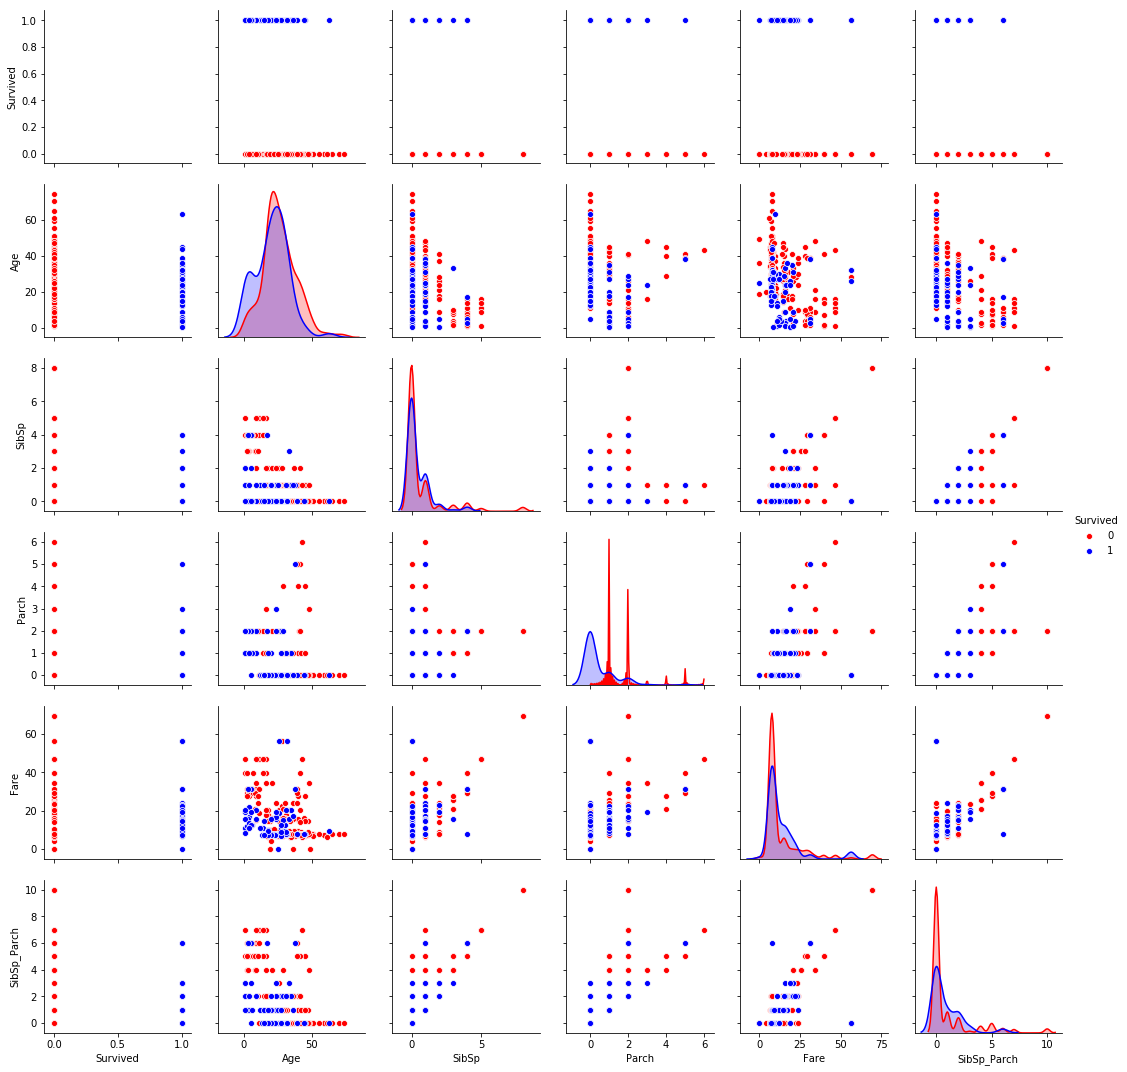

In [56]:
col_list = ["Pclass_1","Pclass_2","Pclass_3"]
for col in col_list:

    print(col)
    df_tmp = df_train_feature[df_train_feature[col]==1]
    df_tmp= df_tmp[df_train_feature.columns[:10]]
    sns.pairplot(df_tmp, hue="Survived", size=2.5,palette={0:"red",1:"blue"})
    plt.show()

Embarked_C


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program File

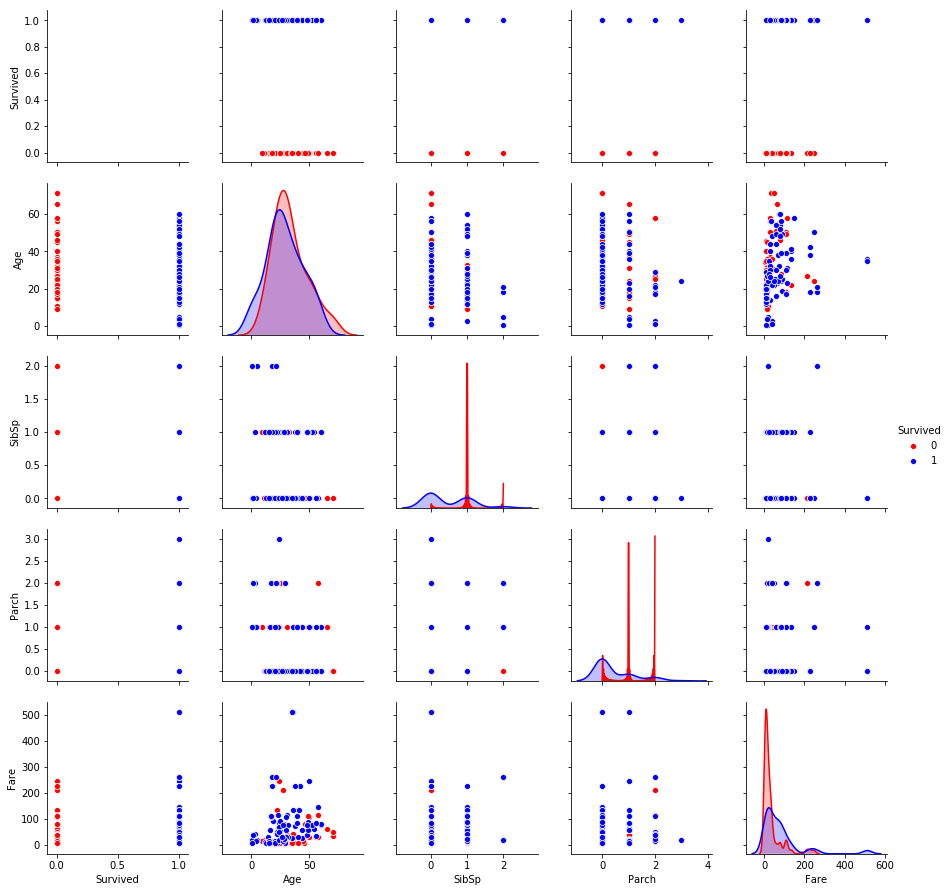

Embarked_Q


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


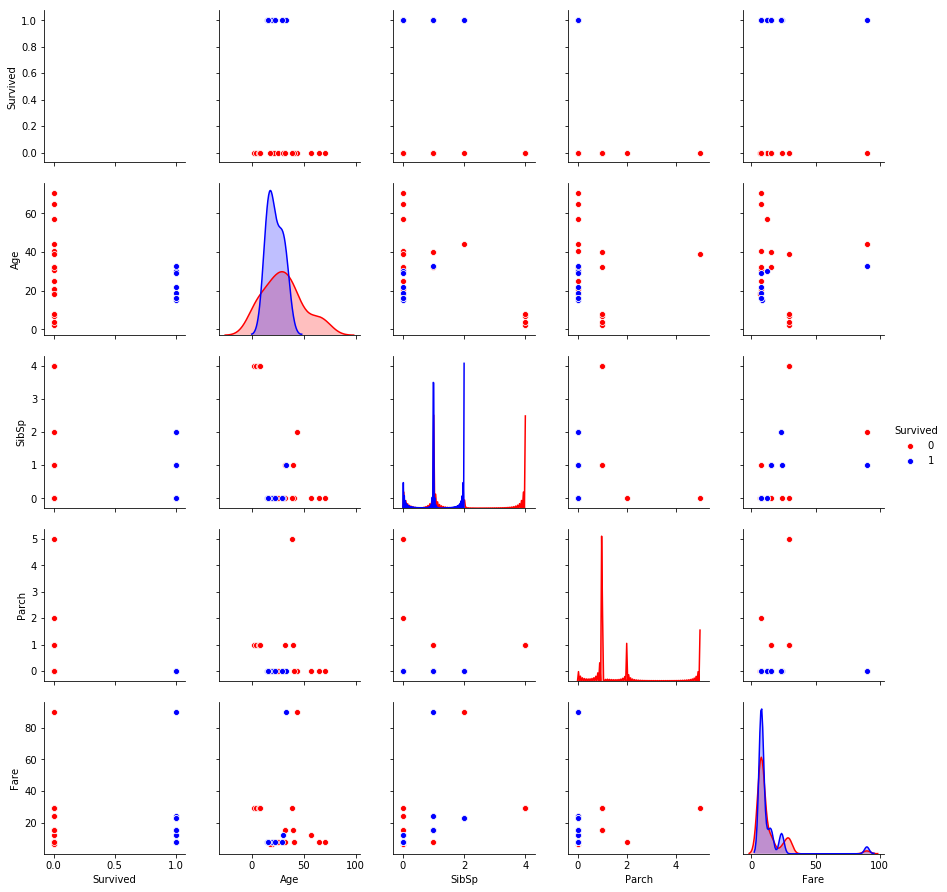

Embarked_S


C:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


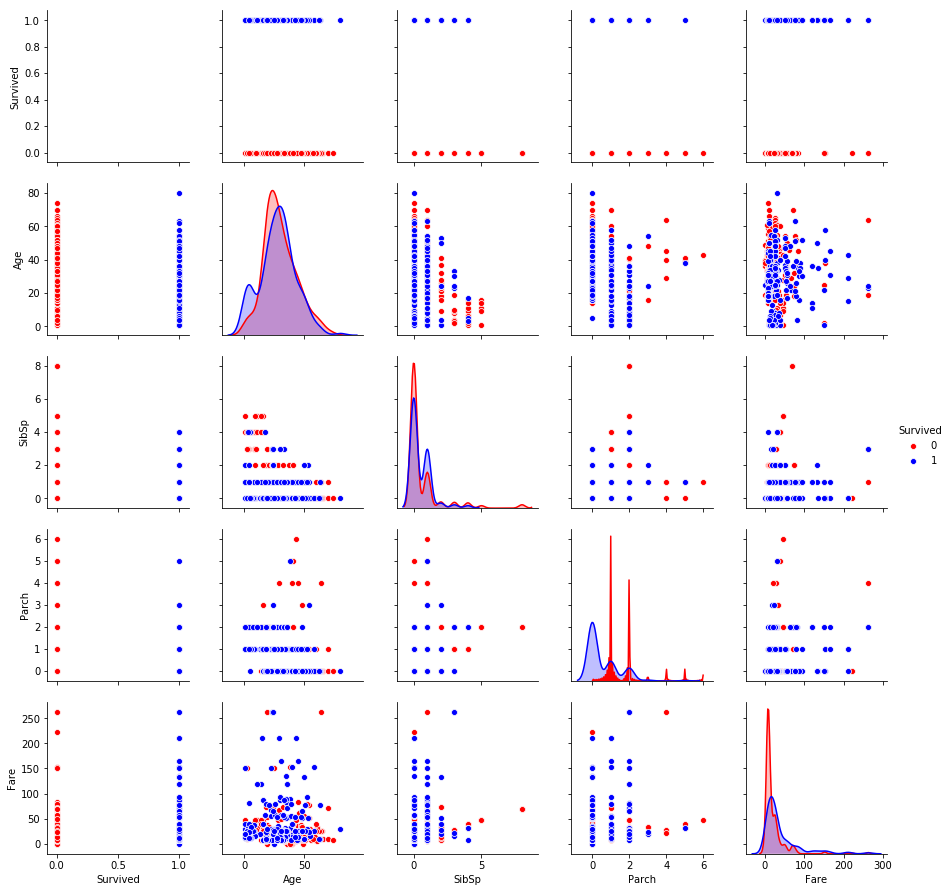

In [57]:
col_list = ["Embarked_C","Embarked_Q","Embarked_S"]
for col in col_list:

    print(col)
    df_tmp = df_train_feature[df_train_feature[col]==1]
    df_tmp= df_tmp[df_train_feature.columns[:9]]
    sns.pairplot(df_tmp, hue="Survived", size=2.5,palette={0:"red",1:"blue"})
    plt.show()

In [59]:
df_train_feature.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [66]:
df_Name = df_train_feature.Name.str.split(',', expand=True)
df_Name2 = df_Name[df_Name.columns[1]].str.split('.', expand=True)
df_Name2 = df_Name2.rename(columns={df_Name2.columns[0]:"Sex",df_Name2.columns[1]:"last_name"})
df_Name2["first_name"]=df_Name[df_Name.columns[0]]
df_Name2

,Sex,last_name,2,first_name
0,Mr,Owen Harris,None,Braund
1,Mrs,John Bradley (Florence Briggs Thayer),None,Cumings
2,Miss,Laina,None,Heikkinen
3,Mrs,Jacques Heath (Lily May Peel),None,Futrelle
4,Mr,William Henry,None,Allen
5,Mr,James,None,Moran
6,Mr,Timothy J,None,McCarthy
7,Master,Gosta Leonard,None,Palsson
8,Mrs,Oscar W (Elisabeth Vilhelmina Berg),None,Johnson
9,Mrs,Nicholas (Adele Achem),None,Nasser


In [68]:
df_Name2.last_name.value_counts()

 John                                       9
 James                                      7
 William                                    6
 Mary                                       6
 Ivan                                       4
 William Henry                              4
 William John                               4
 Bertha                                     4
 Anna Sofia                                 3
 Patrick                                    3
 Anna                                       3
 Tannous                                    3
 George                                     3
 Alfred                                     3
 Samuel                                     3
 Victor                                     3
 Martin                                     3
 Benjamin                                   2
 Charles H                                  2
 Thomas                                     2
 Elizabeth                                  2
 Frederick                        